Title: Impute Missing Values Using K-Nearest Neighbors  
Slug: impute_missing_values_with_k-nearest_neighbors  
Summary: Impute Missing Values Using K-Nearest Neighbors.   
Date: 2016-09-06 12:00  
Category: Machine Learning  
Tags: Basics  
Authors: Samira Ouaaz

Nearest neighbor imputations which weights samples using the mean squared difference on features for which two rows both have observed data. In this example, we use 3 nearest rows which have a feature to fill in each row's missing features.

## Preliminaries

In [1]:
import pandas as pd
import numpy as np
from fancyimpute import KNN
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

Using Theano backend.


## Create Data

In [2]:
df = pd.DataFrame()

df['x0'] = [0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
df['x1'] = [np.nan,0.2654,0.2615,0.5846,0.4615,0.8308,0.4962,0.3269,0.5346,0.6731]


df.head()

,x0,x1
0,0.3051,NaN
1,0.4949,0.2654
2,0.6974,0.2615
3,0.3769,0.5846
4,0.2231,0.4615


## View The Raw Data

In [3]:
# Create data, with the first observation containing a missing value
X = df.as_matrix(columns=['x0', 'x1'])

# View data
X

array([[ 0.3051,     nan],
       [ 0.4949,  0.2654],
       [ 0.6974,  0.2615],
       [ 0.3769,  0.5846],
       [ 0.2231,  0.4615],
       [ 0.341 ,  0.8308],
       [ 0.4436,  0.4962],
       [ 0.5897,  0.3269],
       [ 0.6308,  0.5346],
       [ 0.5   ,  0.6731]])

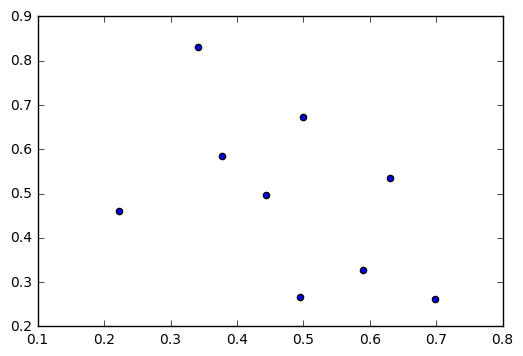

In [4]:
# Plot data
plt.scatter(X[:,0],X[:,1])

## Impute Using K-Nearest Neighbors

In [5]:
# Imput missing values from three closest observations
X_imputed = KNN(k=3).complete(X)

# View new data
X_imputed

Computing pairwise distances between 10 samples
Computing distances for sample #1/10, elapsed time: 0.001
Imputing row 1/10 with 1 missing columns, elapsed time: 0.004


array([[ 0.3051    ,  0.73900744],
       [ 0.4949    ,  0.2654    ],
       [ 0.6974    ,  0.2615    ],
       [ 0.3769    ,  0.5846    ],
       [ 0.2231    ,  0.4615    ],
       [ 0.341     ,  0.8308    ],
       [ 0.4436    ,  0.4962    ],
       [ 0.5897    ,  0.3269    ],
       [ 0.6308    ,  0.5346    ],
       [ 0.5       ,  0.6731    ]])

Notice that the first observation previously contained a missing value. However, now it contains a new value: `0.73900744`

## View Imported Value

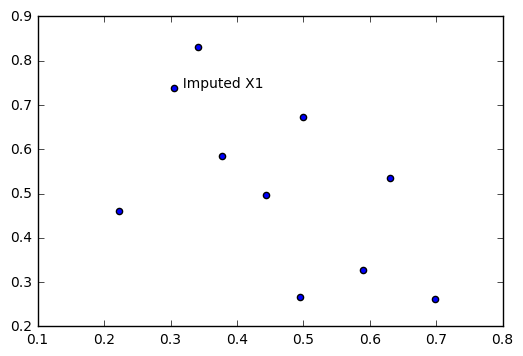

In [6]:
n=['  Imputed X1','','','','','','','','','']

fig, ax = plt.subplots()
ax.scatter(X_imputed[:,0], X_imputed[:,1])

for i, txt in enumerate(n):
    ax.annotate(txt, (X_imputed[:,0][i],X_imputed[:,1][i]))